<a href="https://colab.research.google.com/github/Nithyasree0602/Nithya/blob/main/Kovai_co_Task_Time_Series_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Forecasting Public Transport Usage

22AM030 Nithya Sree RS

Load and Inspect the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

In [ ]:
print(df.head())
print(df.dtypes)
print(df.isnull().sum())

         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  
Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


Data Cleaning & Preprocessing


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.fillna(method='ffill', inplace=True)
service_types = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

<ipython-input-5-b115f22e20e7>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


3.Exploratory Data Analysis (EDA)


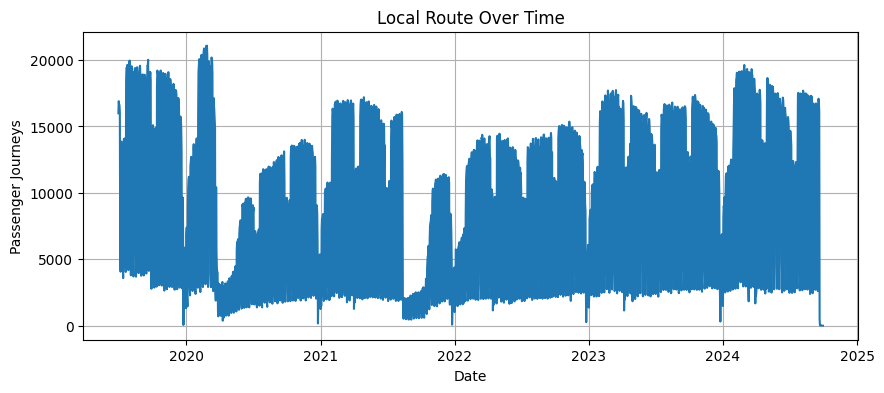

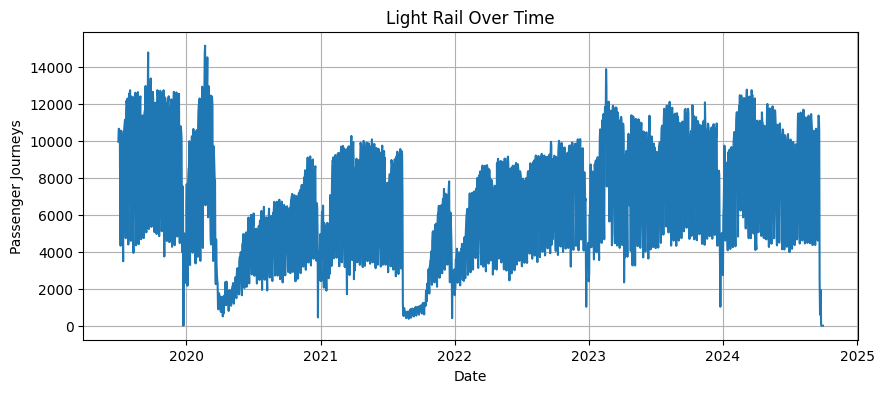

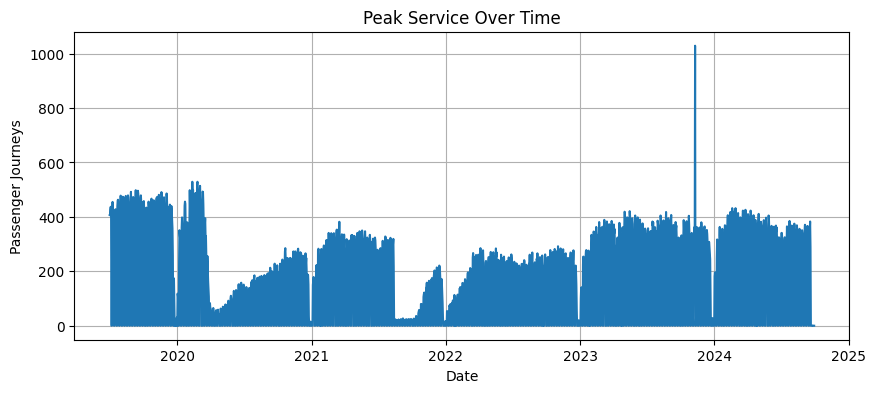

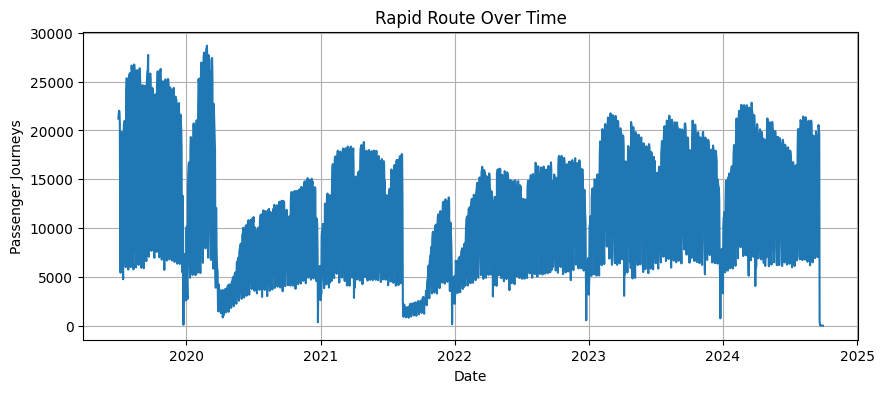

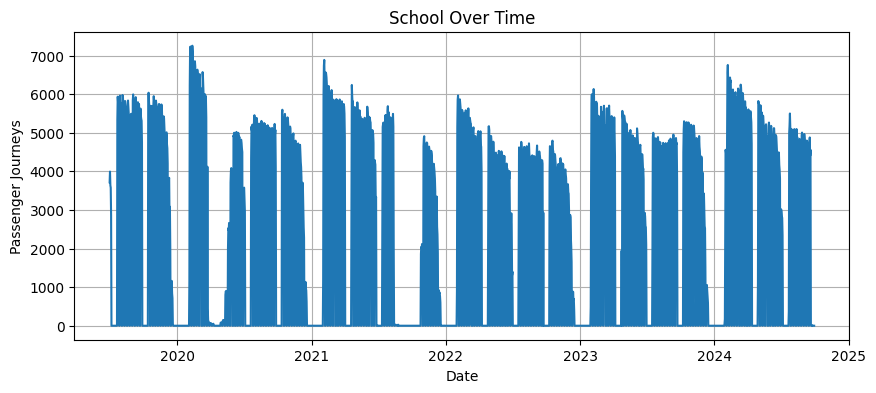

In [ ]:
# Time Series Plots
for service in service_types:
    plt.figure(figsize=(10, 4))
    plt.plot(df['Date'], df[service])
    plt.title(f'{service} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Passenger Journeys')
    plt.grid(True)
    plt.show()

              Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290
School           0.852356    0.685795      0.728795     0.754290  1.000000


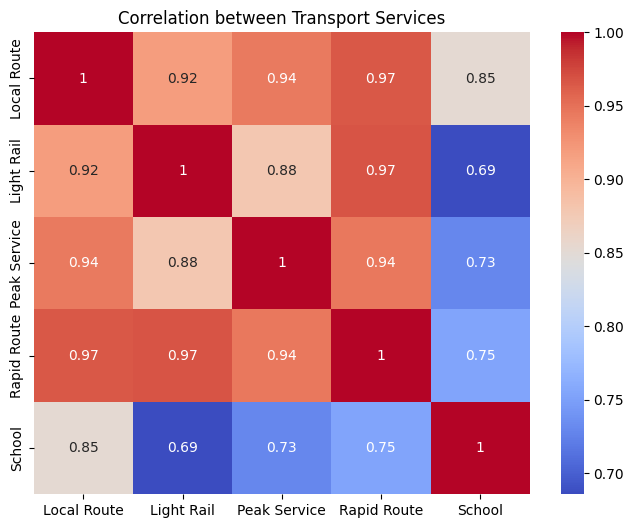

In [ ]:
# Correlation Heatmap
print(df[service_types].corr())
plt.figure(figsize=(8, 6))
sns.heatmap(df[service_types].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Transport Services")
plt.show()

In [ ]:
# Descriptive Statistics
print(df[service_types].describe())

        Local Route    Light Rail  Peak Service   Rapid Route       School
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306
min        1.000000      0.000000      0.000000      0.000000     0.000000
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000


 5.Seasonal Decomposition


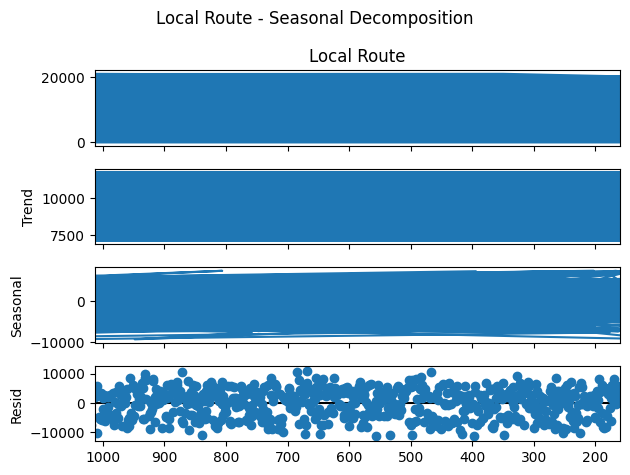

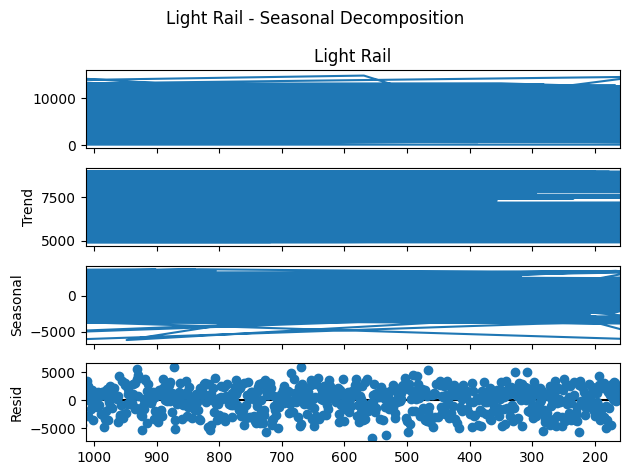

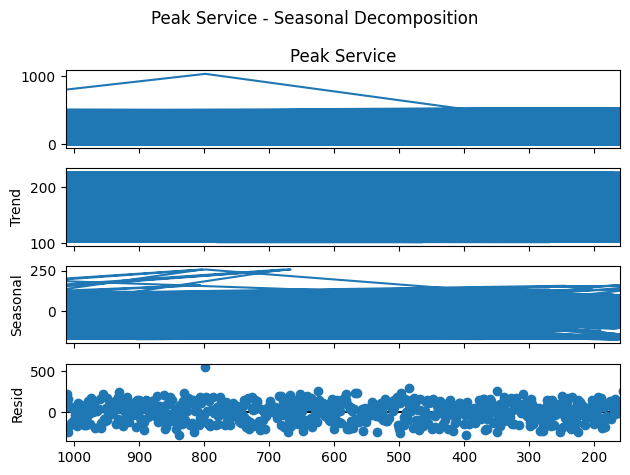

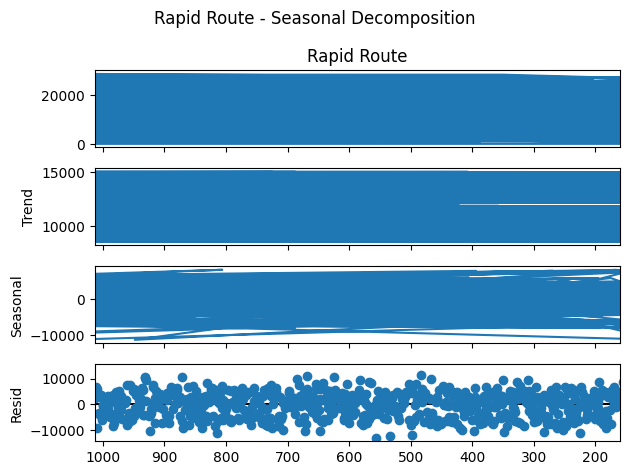

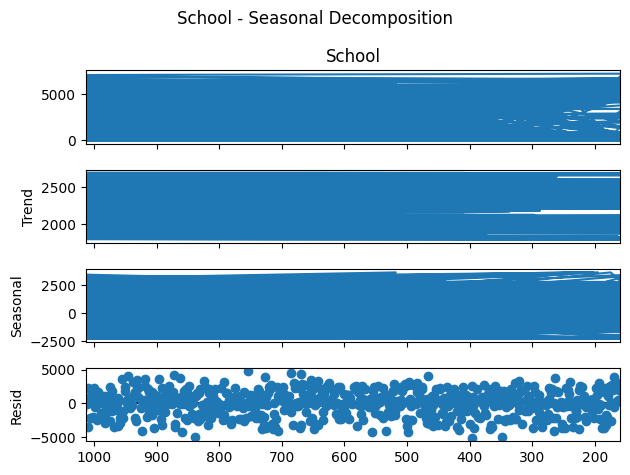

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

for service in service_types:
    decomposition = seasonal_decompose(df[service], model='additive', period=365)
    decomposition.plot()
    plt.suptitle(f'{service} - Seasonal Decomposition')
    plt.tight_layout()
    plt.show()

6.Prophet Forecast (Next 7 Days)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/k9gjkfin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/d83oon2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53286', 'data', 'file=/tmp/tmpcfthhv8_/k9gjkfin.json', 'init=/tmp/tmpcfthhv8_/d83oon2v.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modelilwzcip4/prophet_model-20250603055058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


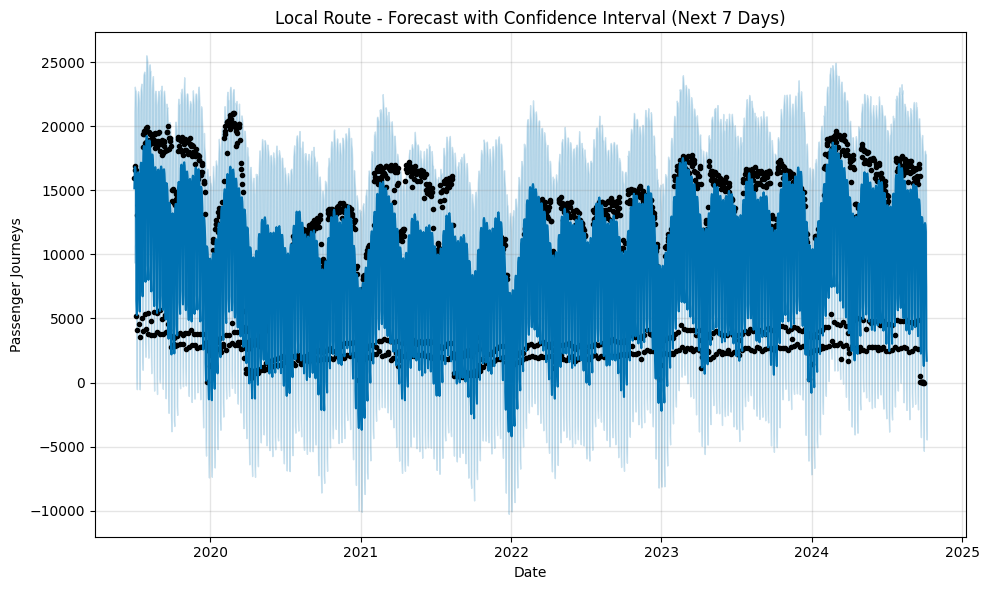

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/3fs1ve17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/waepo17w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11979', 'data', 'file=/tmp/tmpcfthhv8_/3fs1ve17.json', 'init=/tmp/tmpcfthhv8_/waepo17w.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modelvglbq6a0/prophet_model-20250603055100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


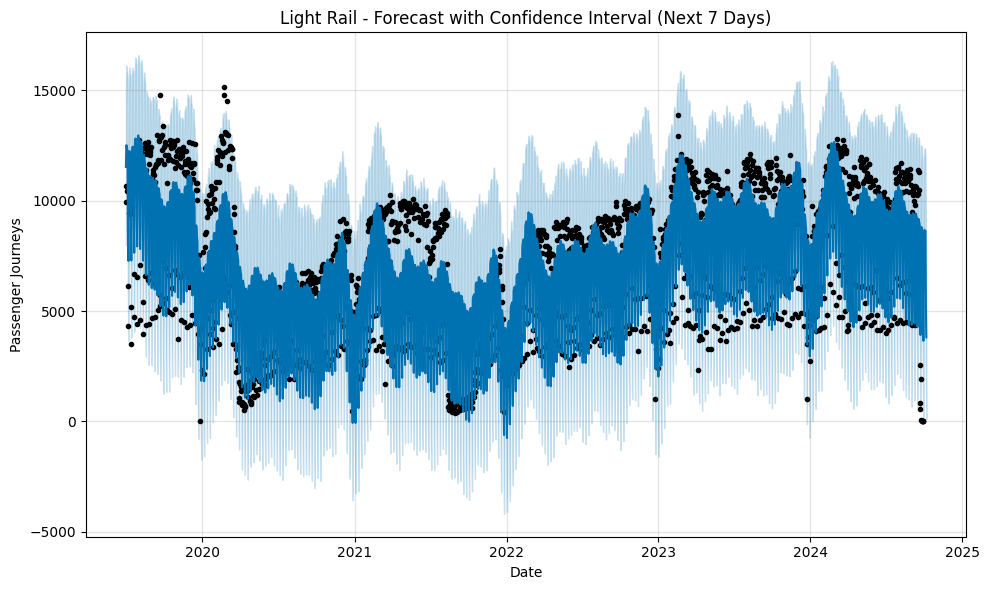

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/ii4bucyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/1ttlylxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30030', 'data', 'file=/tmp/tmpcfthhv8_/ii4bucyz.json', 'init=/tmp/tmpcfthhv8_/1ttlylxb.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modelswyws8a6/prophet_model-20250603055102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


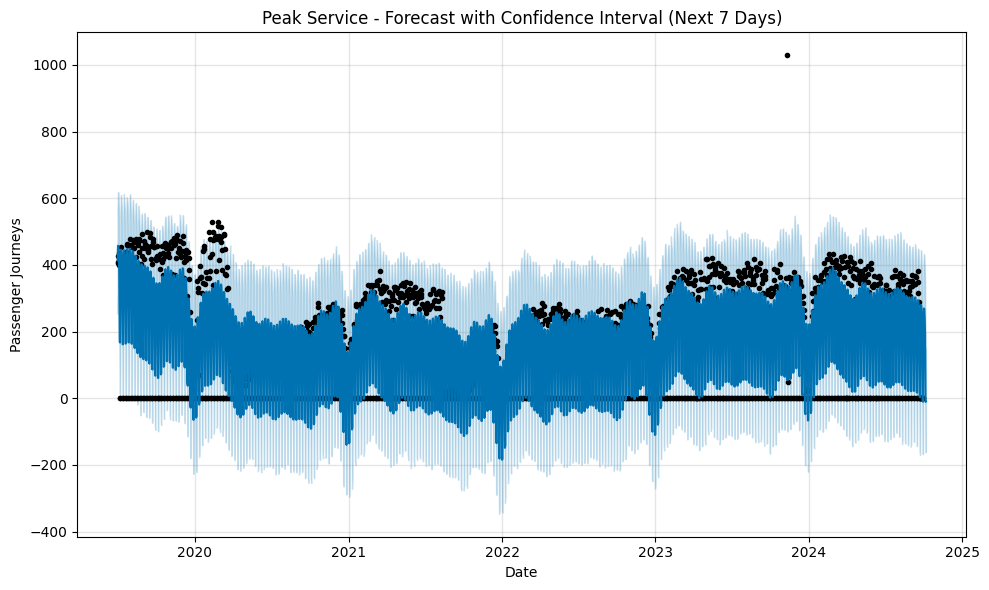

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/2yg0wzr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/iu2m02hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80922', 'data', 'file=/tmp/tmpcfthhv8_/2yg0wzr9.json', 'init=/tmp/tmpcfthhv8_/iu2m02hx.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modeltx6tier8/prophet_model-20250603055103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


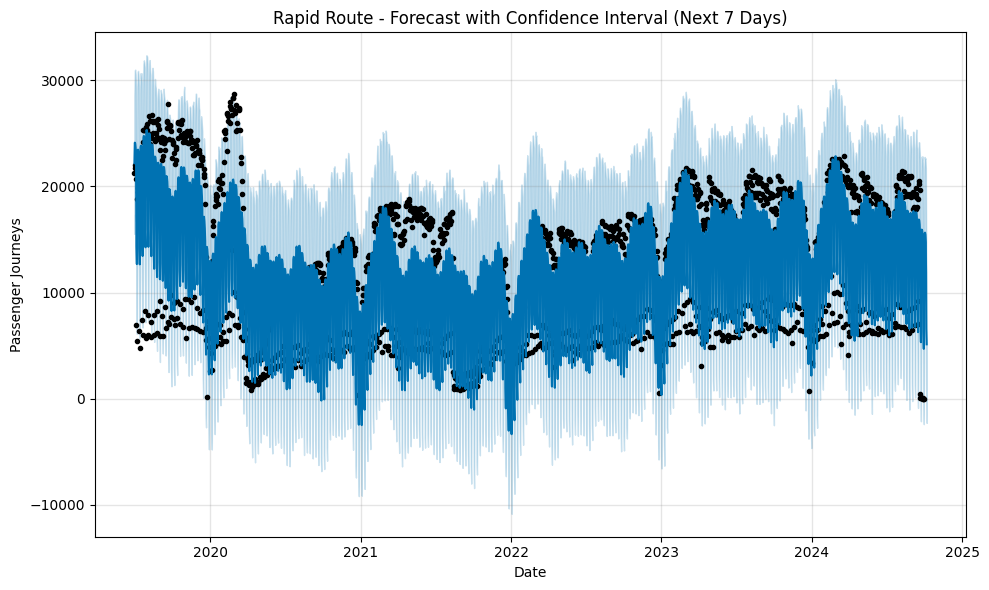

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/gj7l4v9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/g34gbdlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96777', 'data', 'file=/tmp/tmpcfthhv8_/gj7l4v9b.json', 'init=/tmp/tmpcfthhv8_/g34gbdlf.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_model1tqndbwq/prophet_model-20250603055105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


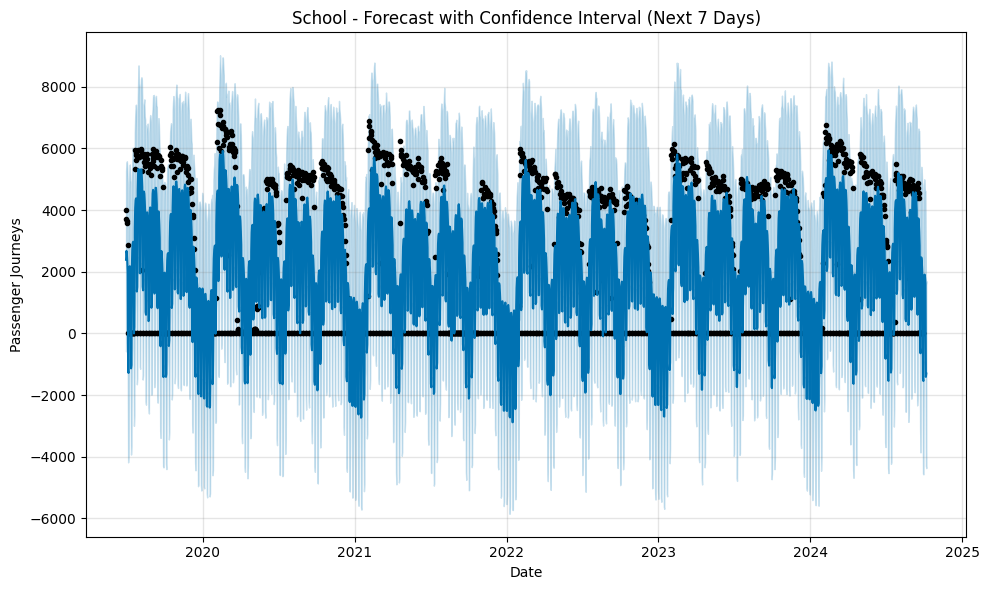

In [ ]:
from prophet import Prophet

prophet_models = {}
prophet_forecasts = {}

for service in service_types:
    service_df = df[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})
    model = Prophet(interval_width=0.95)
    model.fit(service_df)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    prophet_models[service] = model
    prophet_forecasts[service] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

    fig = model.plot(forecast)
    plt.title(f'{service} - Forecast with Confidence Interval (Next 7 Days)')
    plt.xlabel("Date")
    plt.ylabel("Passenger Journeys")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

7.Forecast Summary Table

In [ ]:
print("\n7-Day Forecast Summary:\n")
forecast_summary = pd.DataFrame({'Date': prophet_forecasts['Local Route']['ds']})
for service in service_types:
    forecast_summary[service] = prophet_forecasts[service]['yhat'].round(0).astype(int)

print(forecast_summary)


7-Day Forecast Summary:

           Date  Local Route  Light Rail  Peak Service  Rapid Route  School
1918 2024-09-30        10495        7583           224        13451    1425
1919 2024-10-01        12290        8638           269        15559    1849
1920 2024-10-02        12455        8680           269        15646    1909
1921 2024-10-03        12304        8600           242        15457    1812
1922 2024-10-04        11775        8630           191        14750    1629
1923 2024-10-05         2627        5166           -11         6564   -1410
1924 2024-10-06         1702        3809           -10         5115   -1302


8.Cross-Validation for Prophet

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

for service in service_types:
    print(f"\n📏 {service} - Cross-Validation Performance:")
    df_service = df[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})
    m = Prophet()
    m.fit(df_service)
    df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='30 days', parallel="processes")
    df_metrics = performance_metrics(df_cv)
    print(df_metrics[['horizon', 'mae', 'rmse']].head())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/reeiat54.json



📏 Local Route - Cross-Validation Performance:


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/vps2dpd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53396', 'data', 'file=/tmp/tmpcfthhv8_/reeiat54.json', 'init=/tmp/tmpcfthhv8_/vps2dpd7.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modeln0_77870/prophet_model-20250603054130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2020-09-20 00:00:00 and 2024-08-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79b6cac34450>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/y_ny4u_w.json
DEBUG:cmdstanpy:input tempfile: 

  horizon          mae         rmse
0  3 days  2462.694470  3331.023565
1  4 days  2734.496406  3807.393298
2  5 days  2694.410014  3889.166549
3  6 days  3087.920109  4341.322998
4  7 days  3280.738767  4397.770560

📏 Light Rail - Cross-Validation Performance:


05:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2020-09-20 00:00:00 and 2024-08-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79b739ef6990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/76lh3luy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/z4vg27ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/44mm7fan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44457', 'data', 'file=/tmp/tmpcfthhv8_/76lh3luy.json', 'init=/tmp/tmpcfthhv8_/44mm7fan.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_model1i2tut_9/prophet_model-20250603054134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/sikjm0uo.json
05:41

  horizon          mae         rmse
0  3 days  1596.035353  2249.601423
1  4 days  1740.402710  2452.767700
2  5 days  1830.910890  2617.047865
3  6 days  2024.044658  2903.932049
4  7 days  2178.312718  3113.953143

📏 Peak Service - Cross-Validation Performance:


05:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2020-09-20 00:00:00 and 2024-08-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79b6cac7b8d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/5tv90_yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/iso7czoi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/uj6qevr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80699', 'data', 'file=/tmp/tmpcfthhv8_/iso7czoi.json', 'init=/tmp/tmpcfthhv8_/uj6qevr0.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modeljzuwzcn9/prophet_model-20250603054138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

  horizon        mae        rmse
0  3 days  57.414146   79.433098
1  4 days  59.799517   87.008973
2  5 days  65.651915   93.511779
3  6 days  83.989017  112.183130
4  7 days  90.533751  113.796947

📏 Rapid Route - Cross-Validation Performance:


05:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2020-09-20 00:00:00 and 2024-08-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79b6d1b44bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/skq8ps1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/czzxa0pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/zlxa7nzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/c_1vq3cz.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97182', 'data', 'file=/tmp/tmpcfthhv8_/czzxa0pp.json', 'init=/tmp/tmpcfthhv8_/zlxa7nzo.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modelmchr5amq/prophet_model-20250603054141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41

  horizon          mae         rmse
0  3 days  2711.653356  4018.913709
1  4 days  2969.707127  4339.173771
2  5 days  3107.857546  4594.393274
3  6 days  3673.542188  5293.300488
4  7 days  4079.693813  5632.273795

📏 School - Cross-Validation Performance:


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/ar3qvp4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67581', 'data', 'file=/tmp/tmpcfthhv8_/w5a3ylus.json', 'init=/tmp/tmpcfthhv8_/ar3qvp4r.json', 'output', 'file=/tmp/tmpcfthhv8_/prophet_modeln3h8elar/prophet_model-20250603054145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2020-09-20 00:00:00 and 2024-08-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79b6d07b7f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcfthhv8_/t6dltwkg.json
DEBUG:cmdstanpy:input tempfile: 

  horizon          mae         rmse
0  3 days  1213.887736  1514.400971
1  4 days  1297.267534  1616.980428
2  5 days  1283.279606  1587.055024
3  6 days  1349.952174  1672.293795
4  7 days  1329.914418  1610.394201


9.Simulated Scenario - School Reopens

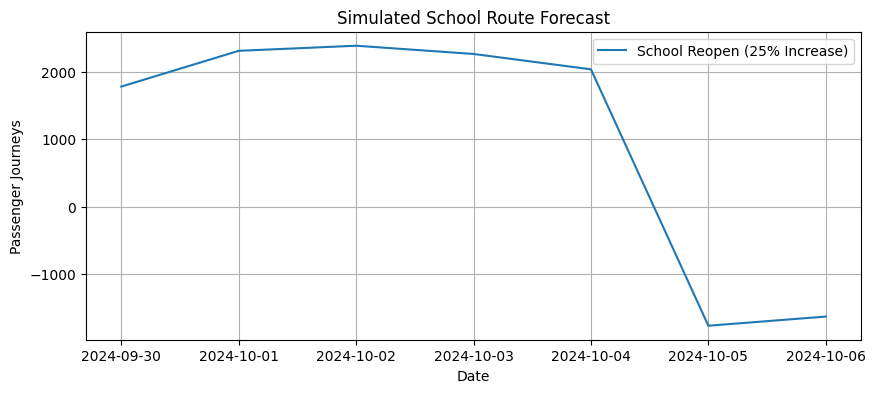

In [ ]:
school_forecast = prophet_forecasts['School'].copy()
school_forecast['yhat'] *= 1.25  # simulate 25% increase
plt.figure(figsize=(10, 4))
plt.plot(school_forecast['ds'], school_forecast['yhat'], label='School Reopen (25% Increase)')
plt.title("Simulated School Route Forecast")
plt.xlabel("Date")
plt.ylabel("Passenger Journeys")
plt.legend()
plt.grid(True)
plt.show()